In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
%matplotlib inline

O que este notebook ira realizar:
---------------------------------

1. Analise dos resultados dos notebooks anteriores retirados do site da OLX (50 registros de casas à venda em SP)
2. Selecionar apenas os anuncios de Casas
3. Agrupar os registros pelo bairro com a soma e media dos preços
4. Mostrar os dez maiores valores do agrupamento em grafico usando a biblioteca **Matplotlib**

In [2]:
df = pd.read_excel('1-OLX_WebScrap/1_OLX_SEM_CEP.xlsx')

In [3]:
df.head()

,categoria,titulo,preco,cep,bairro,profissional
0,"Terrenos, sítios e fazendas","Terreno 1000 m² Próximo da Região de Arujá, Gu...",40000,03720-120,Vila Paulistania,N
1,Casas,Ótima casa na Vila Curuça,350000,08070-001,Vila Norma,N
2,Aluguel de quartos,Vagas para moças(metrô Belem),500,03174-020,Quarta Parada,N
3,Casas,Ótima casa em cond para locação Jardim Arize,700,03526-010,Jardim Maringá,N
4,Apartamentos,Apartamento alto padrão no Carrão 60M² com sui...,401000,03428-020,Vila Carrão,S


In [4]:
df = df[['bairro', 'categoria', 'preco']]

In [5]:
df.loc[:,['categoria']] = df['categoria'].astype('category')
df.loc[:,['preco']] = df['preco'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
bairro       50 non-null object
categoria    50 non-null category
preco        50 non-null float64
dtypes: category(1), float64(1), object(1)
memory usage: 1.4+ KB


In [7]:
df.groupby(['categoria'])['preco'].count()

categoria
Aluguel de quartos              1
Apartamentos                   22
Casas                          17
Indústria e comércio            6
Terrenos, sítios e fazendas     4
Name: preco, dtype: int64

In [8]:
df.categoria.unique()

[Terrenos, sítios e fazendas, Casas, Aluguel de quartos, Apartamentos, Indústria e comércio]
Categories (5, object): [Terrenos, sítios e fazendas, Casas, Aluguel de quartos, Apartamentos, Indústria e comércio]

In [9]:
#Seleciona apenas anuncios de Categoria 'Casas'
df_casa = df[df['categoria'] == 'Casas']
#Reseta o index do DataFrame
df_casa = df_casa.reset_index()
#seleciona apenas a coluna bairro e preço
df_casa = df_casa[['bairro', 'preco']]

In [10]:
#cria um data frame com a soma dos precos dos bairros
df_soma = df_casa.groupby(['bairro'], as_index=False)['preco'].sum()
#ordena o DataFrame pelo preco descendente
df_soma = df_soma.sort_values(by='preco',ascending=False)
#Reseta o index do DataFrame
df_soma = df_soma.reset_index(drop='index')

In [11]:
#cria um data frame com a media dos precos dos bairros
df_media = df_casa.groupby(['bairro'], as_index=False)['preco'].mean()
#ordena o DataFrame pela media de preco descendente
df_media = df_media.sort_values(by='preco',ascending=False)
#Reseta o index do DataFrame
df_media = df_media.reset_index(drop='index')

In [12]:
#Seleciona os dez primeiros bairros da soma de preços
df_soma_dez=df_soma.head(10)

In [13]:
#Seleciona os dez primeiros bairros da media de preços
df_media_dez=df_media.head(10)

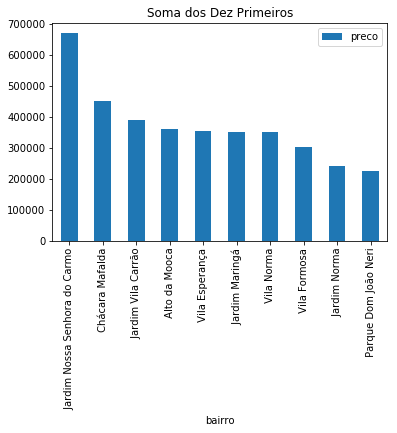

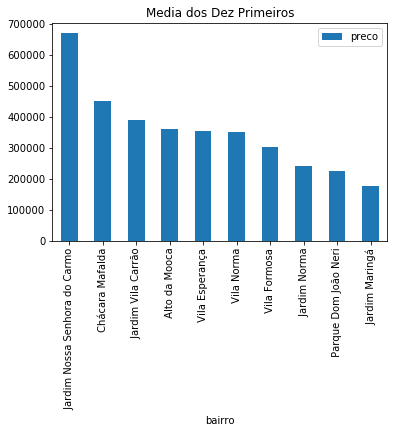

In [14]:
#Graficos da soma e media dos dez bairros mais caros, respectivamente
df_soma_dez.plot.bar(x=df_soma_dez['bairro'],title='Soma dos Dez Primeiros')

df_media_dez.plot.bar(x=df_media_dez['bairro'],title='Media dos Dez Primeiros')